*Calculo Beta financiera*

*En anteriores apartados, hemos hecho referencia al cálculo de la Beta de una compañía que cotiza en bolsa. Vamos a ver un ejemplo de como calcularlo en Python.*

In [1]:
pip install numpy-financial

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy_financial as npf
import numpy as np
import pandas as pd

*Importamos esta librería que nos permite leer datos del la página yahoo finance, donde están los principales índices búrsatiles y podemos descargar los datos historicos*

In [4]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23447 sha256=b4fefed7417077ce8d1168c1482556afad309d895ec0a6dc22e558b954a7a31e
  Stored in directory: c:\users\rebec\appdata\local\pip\cache\wheels\7e\d5\f4\f628965651f61ae35c2bdc73571ce1a2026e1550a336b5ad4b
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8374 sha256=a612b303c5c2318119bdc005239668bd658ac60bf23d706f932a32ec5dccfd59
  Stored in directory: c:\users\rebec\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf

*Para descargar el histórico de cotizaciones de una empresa utilizamos esta función, indicando en primer lugar el código de la empresa (a continuación indicamos alguns de los códigos de las empresas cotizadas en el Ibex35, pero podemos buscarlo en la propia página de yahoo), y después indicamos el histórico que queremos descargar, o bien indicamos una fecha de inicio o fin, existen ambas posibilidades.*

**Símbolo	Nombre de la empresa**

**NTGY.MC**	Naturgy Energy Group, S.A.

**CABK.MC**	CaixaBank, S.A.

**ACS.MC**	ACS, Actividades de Construcción y Servicios, S.A.

**ENG.MC**	Enagás, S.A.

**BKT.MC**	Bankinter, S.A.

**AENA.MC**	Aena S.M.E., S.A.

**ELE.MC**	Endesa, Sociedad Anonima

**SGRE.MC**	Siemens Gamesa Renewable Energy, S.A.

**TEF.MC**	Telefónica, S.A.

**REP.MC**	Repsol, S.A.

**IBE.MC**	Iberdrola, S.A.

**SAN.MC**	Banco Santander, S.A.

**MAP.MC**	Mapfre, S.A.


In [108]:
data = yf.download("CABK.MC", period = '6mo')
data = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


*Aquí podemos ver el precio de cotización de apertura, el más alto del día, el más bajo y el precio de cierre, además del precio de cierro ajustado y el volumen de operaciones.*

*La columna que nos interesa será los precios de cierre*

In [110]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-06,1.7230,1.8035,1.7035,1.7775,1.7775,14525635
2020-10-07,1.7615,1.7910,1.7470,1.7540,1.7540,11006112
2020-10-08,1.7645,1.8030,1.7560,1.7860,1.7860,8516156
2020-10-09,1.7930,1.7995,1.7400,1.7475,1.7475,10898370
2020-10-12,1.7450,1.7510,1.6970,1.7080,1.7080,10649303
...,...,...,...,...,...,...
2021-03-29,2.6000,2.6560,2.5630,2.5900,2.5900,23692618
2021-03-30,2.6260,2.7000,2.6060,2.6860,2.6860,14169456
2021-03-31,2.6850,2.7000,2.6390,2.6390,2.6390,90831719


In [111]:
data = data.loc[:,["Adj Close"]]

*Vamos a añadir una columna que nos calcula el log de todos los retornos*

In [112]:
data["Dv"] = np.log( data / data.shift(1))

In [113]:
data

,Adj Close,Dv
Date,,
2020-10-06,1.7775,NaN
2020-10-07,1.7540,-0.013309
2020-10-08,1.7860,0.018080
2020-10-09,1.7475,-0.021792
2020-10-12,1.7080,-0.022863
...,...,...
2021-03-29,2.5900,-0.008075
2021-03-30,2.6860,0.036395
2021-03-31,2.6390,-0.017653


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F3F042520>],
      dtype=object)

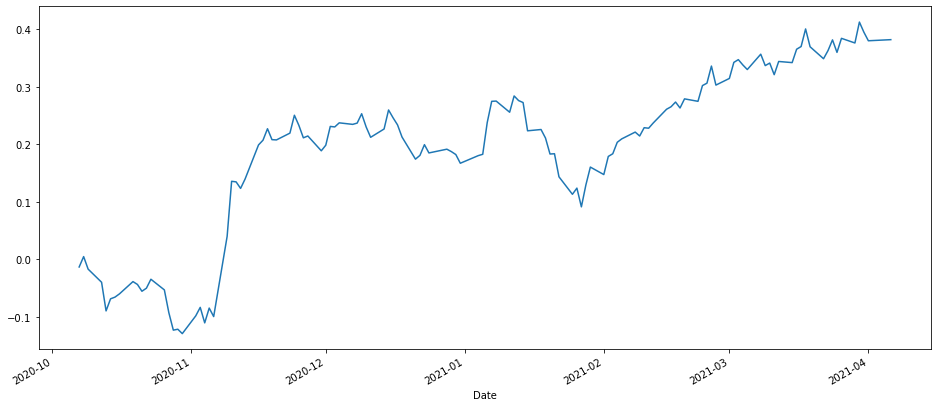

In [147]:
data['Dv'].cumsum().plot(subplots=True,figsize=(16,7)) 

*Mediante este gráfico podemos ver la evolución de CaixaBank en los últimos 6 meses*

*Ahora, vamos a hacer lo mismo pero con el índice de referencia, en este caso **IBEX35**. Hay que tener en cuenta que podemos hacerlo con cualquiera de los índices que están publicados*

In [114]:
mercado = yf.download("^IBEX", period = '6mo')
mercado = pd.DataFrame(mercado)

[*********************100%***********************]  1 of 1 completed


In [115]:
mercado

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-06,6860.100098,6975.399902,6838.799805,6936.200195,6936.200195,265233500
2020-10-07,6920.200195,6952.600098,6887.100098,6910.100098,6910.100098,207416200
2020-10-08,6953.200195,7018.799805,6951.700195,6992.799805,6992.799805,202093000
2020-10-09,6992.899902,7024.600098,6936.700195,6950.899902,6950.899902,182746300
2020-10-12,6968.799805,6979.899902,6924.799805,6951.000000,6951.000000,167258200
...,...,...,...,...,...,...
2021-03-29,8502.799805,8540.400391,8451.500000,8492.099609,8492.099609,177594200
2021-03-30,8542.900391,8612.299805,8532.400391,8595.200195,8595.200195,171860100
2021-03-31,8594.700195,8652.200195,8568.000000,8580.000000,8580.000000,265542300


In [116]:
mercado = mercado.loc[:,["Adj Close"]]

In [117]:
mercado

,Adj Close
Date,
2020-10-06,6936.200195
2020-10-07,6910.100098
2020-10-08,6992.799805
2020-10-09,6950.899902
2020-10-12,6951.000000
...,...
2021-03-29,8492.099609
2021-03-30,8595.200195
2021-03-31,8580.000000


In [120]:
mercado["Dv"] = np.log( mercado / mercado.shift(1))

In [121]:
mercado

,Adj Close,Dv
Date,,
2020-10-06,6936.200195,NaN
2020-10-07,6910.100098,-0.003770
2020-10-08,6992.799805,0.011897
2020-10-09,6950.899902,-0.006010
2020-10-12,6951.000000,0.000014
...,...,...
2021-03-29,8492.099609,-0.000718
2021-03-30,8595.200195,0.012068
2021-03-31,8580.000000,-0.001770


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F3FC8D430>],
      dtype=object)

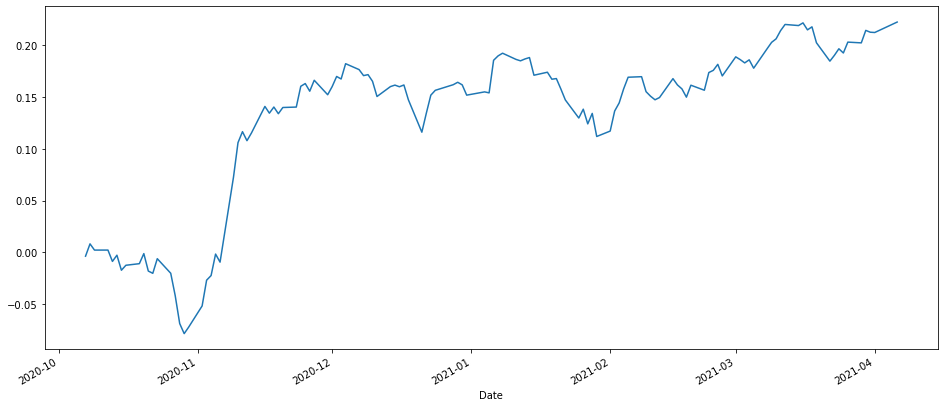

In [148]:
mercado['Dv'].cumsum().plot(subplots=True,figsize=(16,7)) 

*En este gráfico vemos la evolución del Ibex35 en los últimos 6 meses*

*Ahora vamos a hacer un único DataFrame para tener los datos en un mismo archivo*

In [124]:
data["Adj Close Mercado"] = mercado['Adj Close']
data["Dv Mercado"] = mercado['Dv']

In [125]:
data

,Adj Close,Dv,Adj Close Mercado,Dv Mercado
Date,,,,
2020-10-06,1.7775,NaN,6936.200195,NaN
2020-10-07,1.7540,-0.013309,6910.100098,-0.003770
2020-10-08,1.7860,0.018080,6992.799805,0.011897
2020-10-09,1.7475,-0.021792,6950.899902,-0.006010
2020-10-12,1.7080,-0.022863,6951.000000,0.000014
...,...,...,...,...
2021-03-29,2.5900,-0.008075,8492.099609,-0.000718
2021-03-30,2.6860,0.036395,8595.200195,0.012068
2021-03-31,2.6390,-0.017653,8580.000000,-0.001770


*Podemos exportar este fichero a Excel, en este caso lo hemos realizado para cotejar los resultados y verificar que los cálculos son correctos, pero no es necesario. También podemos descargar varios valores, unirlos en un DataFrame y exportar a Excel para realizar cálculos u visualizaciones*

In [130]:
data.to_excel("Data.xlsx", sheet_name="Sheet1")

*Recordemos cómo se calcula la Beta de una compañía*

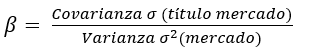

*Vamos a calcular la covarianza del título, en este caso de CaixaBank*

In [164]:
cov = data.cov()

In [165]:
cov

,Adj Close,Dv,Adj Close Mercado,Dv Mercado
Adj Close,0.087205,0.000670,166.469302,0.000099
Dv,0.000670,0.000668,1.189667,0.000275
Adj Close Mercado,166.469302,1.189667,351466.547370,0.415540
Dv Mercado,0.000099,0.000275,0.415540,0.000186


In [168]:
cov_CABK = cov.iloc[1,3]

In [169]:
cov_CABK

0.00027533428273065916

*Calculemos ahora la varianza del mercado*

In [170]:
IBEX_var = data['Dv Mercado'].var()
IBEX_var

0.00018588973412030505

*Finalmente calculamos la Beta de la compañía*

In [171]:

CABK_beta= cov_CABK / IBEX_var # division entre la covarianza contra mercado dividido entre la varianza del mercado
CABK_beta

1.4811699206179236